# <b><span style='color:#F1A424'>AutoML - Regression </span> </b>

## <b> Problem overview:</b>
    

**Dataset Used : Medical insurance Dataset**

**Features**:

- `Age`: The insured person's age.
- `Sex`: Gender (male or female) of the insured.
- `BMI (Body Mass Index)`: A measure of body fat based on height and weight.
- `Children`: The number of dependents covered.
- `Smoker`: Whether the insured is a smoker (yes or no).
- `Region`: The geographic area of coverage.

**Target Variable**:

- `Charges`: The medical insurance costs incurred by the insured person.
    
**Objective**:

The primary objective is typically to build a model that can accurately predict medical insurance costs incurred by the insured person.

**Usecase**:

Here, we will use AutoML(Automated Machine Learning) functionality to automate the entire process of developing a predictive model. It will perform feature exploration, feature engineering, data preparation, model training and evaluation on dataset in custom run and at end we will get leaderboard containined different models along with their performance. Model will also have rank associated with them which indicates which is best performing model for given data followed by other models.

As part of custom AutoML run, we will customize below functionalities:
- Binning on 'age' feature to get 3 different levels.
- Customized target encoding on 'region' feature.
- Train test split with training size 0.9.
- Feature scaling with 'midrange' method.

In [1]:
# Importing AutoML from teradataml
from teradataml import AutoML, AutoRegressor

In [2]:
# Importing other important libraries
import getpass
from teradataml import create_context, remove_context
from teradataml import DataFrame
from teradataml import load_example_data
from teradataml import TrainTestSplit

In [3]:
# Create the connection.
host = getpass.getpass("Host: ")
username = getpass.getpass("Username: ")
password = getpass.getpass("Password: ")

con = create_context(host=host, username=username, password=password)

Host:  ········
Username:  ········
Password:  ········


## <b><span style='color:#F1A424'>| 1.</span> Loading Dataset </b>

In [4]:
# Loading dataset from example data collection
load_example_data('teradataml','insurance')

In [5]:
# Fetching in teradata dataframe
insurance_df = DataFrame("insurance")

In [6]:
# first 5 rows
insurance_df.head()

age,sex,bmi,children,smoker,region,charges
18,female,30.115,0,no,northeast,21344.8467
18,female,31.13,0,no,southeast,1621.8827
18,male,21.565,0,yes,northeast,13747.87235
18,male,17.29,2,yes,northeast,12829.4551
18,male,43.01,0,no,southeast,1149.3959
18,female,31.35,4,no,northeast,4561.1885
18,female,29.165,0,no,northeast,7323.734819
18,female,25.08,0,no,northeast,2196.4732
18,male,15.96,0,no,northeast,1694.7964
18,female,20.79,0,no,southeast,1607.5101


In [7]:
# insurance_df dataset
insurance_df.shape

(1338, 7)

In [8]:
# Performing sampling to get 80% for trainning and 20% for testing
insurance_df_sample = insurance_df.sample(frac = [0.8, 0.2])

In [9]:
insurance_df_sample.head()

age,sex,bmi,children,smoker,region,charges,sampleid
18,male,43.01,0,no,southeast,1149.3959,1
18,female,31.13,0,no,southeast,1621.8827,2
18,female,42.24,0,yes,southeast,38792.6856,1
18,male,34.1,0,no,southeast,1137.011,1
18,male,28.31,1,no,northeast,11272.33139,1
18,male,53.13,0,no,southeast,1163.4627,1
18,male,38.17,0,yes,southeast,36307.7983,1
18,male,33.33,0,no,southeast,1135.9407,1
18,male,25.175,0,yes,northeast,15518.18025,2
18,female,30.115,0,no,northeast,21344.8467,1


In [10]:
# Fetching train and test data
insurance_df_train= insurance_df_sample[insurance_df_sample['sampleid'] == 1].drop('sampleid', axis=1)
insurance_df_test = insurance_df_sample[insurance_df_sample['sampleid'] == 2].drop('sampleid', axis=1)

In [11]:
# train data shape
insurance_df_train.shape

(1070, 7)

In [12]:
# test data shape
insurance_df_test.shape

(268, 7)

In [13]:
#train dataset
insurance_df_train.head()

age,sex,bmi,children,smoker,region,charges
18,female,33.88,0,no,southeast,11482.63485
18,male,38.17,0,yes,southeast,36307.7983
18,male,33.535,0,yes,northeast,34617.84065
18,female,37.29,1,no,southeast,2219.4451
18,male,34.1,0,no,southeast,1137.011
18,male,21.47,0,no,northeast,1702.4553
18,female,25.08,0,no,northeast,2196.4732
18,female,21.66,0,yes,northeast,14283.4594
18,female,31.92,0,no,northeast,2205.9808
18,male,17.29,2,yes,northeast,12829.4551


In [14]:
# test dataset
insurance_df_test.head()

age,sex,bmi,children,smoker,region,charges
18,female,31.13,0,no,southeast,1621.8827
18,female,26.315,0,no,northeast,2198.18985
18,male,35.2,1,no,southeast,1727.54
18,male,26.18,2,no,southeast,2304.0022
18,female,40.28,0,no,northeast,2217.6012
18,male,25.175,0,yes,northeast,15518.18025
18,male,29.37,1,no,southeast,1719.4363
18,female,32.12,2,no,southeast,2801.2588
18,male,33.77,1,no,southeast,1725.5523
18,male,37.29,0,no,southeast,1141.4451


In [15]:
AutoRegressor.generate_custom_config("custom_insurance")


Generating custom config JSON for AutoML ...

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  1



Customizing Feature Engineering Phase ...

Available options for customization of feature engineering phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Missing Value Handling

Index 2: Customize Bincode Encoding

Index 3: Customize String Manipulation

Index 4: Customize Categorical Encoding

Index 5: Customize Mathematical Transformation

Index 6: Customize Nonlinear Transformation

Index 7: Customize Antiselect Features

Index 8: Back to main menu

Index 9: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in feature engineering phase:  2, 4, 8



Customizing Bincode Encoding ...

Provide the following details to customize binning and coding encoding:

Available binning methods with corresponding indices:
Index 1: Equal-Width
Index 2: Variable-Width



Enter the feature or list of features for binning:  age

Enter the index of corresponding binning method for feature age:  1

Enter the number of bins for feature age:  3



Customization of bincode encoding has been completed successfully.

Customizing Categorical Encoding ...

Provide the following details to customize categorical encoding:

Available categorical encoding methods with corresponding indices:
Index 1: OneHotEncoding
Index 2: OrdinalEncoding
Index 3: TargetEncoding



Enter the list of corresponding index categorical encoding methods you want to use:  3

Enter the feature or list of features for TargetEncoding:  region



Available target encoding methods with corresponding indices:
Index 1: CBM_BETA
Index 2: CBM_DIRICHLET
Index 3: CBM_GAUSSIAN_INVERSE_GAMMA



Enter the index of target encoding method for feature region:  3

Enter the response column for target encoding method for feature region:  charges



Customization of categorical encoding has been completed successfully.

Customization of feature engineering phase has been completed successfully.

Available main options for customization with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Feature Engineering Phase

Index 2: Customize Data Preparation Phase

Index 3: Customize Model Training Phase

Index 4: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the index you want to customize:  2



Customizing Data Preparation Phase ...

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Train Test Split

Index 2: Customize Data Imbalance Handling

Index 3: Customize Outlier Handling

Index 4: Customize Feature Scaling

Index 5: Back to main menu

Index 6: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  1,4



Customizing Train Test Split ...



Enter the train size for train test split:  0.9



Customization of train test split has been completed successfully.

Available feature scaling methods with corresponding indices:
Index 1: maxabs
Index 2: mean
Index 3: midrange
Index 4: range
Index 5: rescale
Index 6: std
Index 7: sum
Index 8: ustd



Enter the corresponding index feature scaling method:  3



Customization of feature scaling has been completed successfully.

Available options for customization of data preparation phase with corresponding indices: 
--------------------------------------------------------------------------------

Index 1: Customize Train Test Split

Index 2: Customize Data Imbalance Handling

Index 3: Customize Outlier Handling

Index 4: Customize Feature Scaling

Index 5: Back to main menu

Index 6: Generate custom json and exit
--------------------------------------------------------------------------------



Enter the list of indices you want to customize in data preparation phase:  6



Customization of data preparation phase has been completed successfully.

Process of generating custom config file for AutoML has been completed successfully.

'custom_insurance.json' file is generated successfully under the current working directory.


## <b><span style='color:#F1A424'>| 2.</span> Fitting AutoML </b>

In [16]:
# Creating AutoRegressor instance
# Using all models from model training.
# Keeping early stopping timer threshold to 500 sec
# and verbose level 2 for detailed loggging
# Using custom json file for custom run

aml = AutoRegressor(max_runtime_secs=500, 
                    verbose=2,
                    custom_config_file="custom_insurance.json")


 Received below input for customization : 
{
    "BincodeIndicator": true,
    "BincodeParam": {
        "age": {
            "Type": "Equal-Width",
            "NumOfBins": 3
        }
    },
    "CategoricalEncodingIndicator": true,
    "CategoricalEncodingParam": {
        "TargetEncodingIndicator": true,
        "TargetEncodingList": {
            "region": {
                "encoder_method": "CBM_GAUSSIAN_INVERSE_GAMMA",
                "response_column": "charges"
            }
        }
    },
    "TrainTestSplitIndicator": true,
    "TrainingSize": 0.9,
    "FeatureScalingIndicator": true,
    "FeatureScalingMethod": "midrange"
}


Feature Exploration started ...

Data Overview:
Total Rows in the data: 1070
Total Columns in the data: 7

Column Summary:


ColumnName,Datatype,NonNullCount,NullCount,BlankCount,ZeroCount,PositiveCount,NegativeCount,NullPercentage,NonNullPercentage
region,VARCHAR(20) CHARACTER SET LATIN,1070,0,0,None,None,None,0.0,100.0
bmi,FLOAT,1070,0,None,0,1070,0,0.0,100.0
children,INTEGER,1070,0,None,460,610,0,0.0,100.0
sex,VARCHAR(20) CHARACTER SET LATIN,1070,0,0,None,None,None,0.0,100.0
age,INTEGER,1070,0,None,0,1070,0,0.0,100.0
charges,FLOAT,1070,0,None,0,1070,0,0.0,100.0
smoker,VARCHAR(20) CHARACTER SET LATIN,1070,0,0,None,None,None,0.0,100.0



Statistics of Data:


func,age,bmi,children,charges
min,18,15.96,0,1121.874
std,14.067,6.11,1.222,12247.954
25%,27,26.185,0,4755.81
50%,39,30.4,1,9473.978
75%,51,34.42,2,17309.391
max,64,53.13,5,63770.428
mean,39.162,30.599,1.113,13472.1
count,1070,1070,1070,1070



Categorical Columns with their Distinct values:
ColumnName                DistinctValueCount
sex                       2         
smoker                    2         
region                    4         

No Futile columns found.

Target Column Distribution:


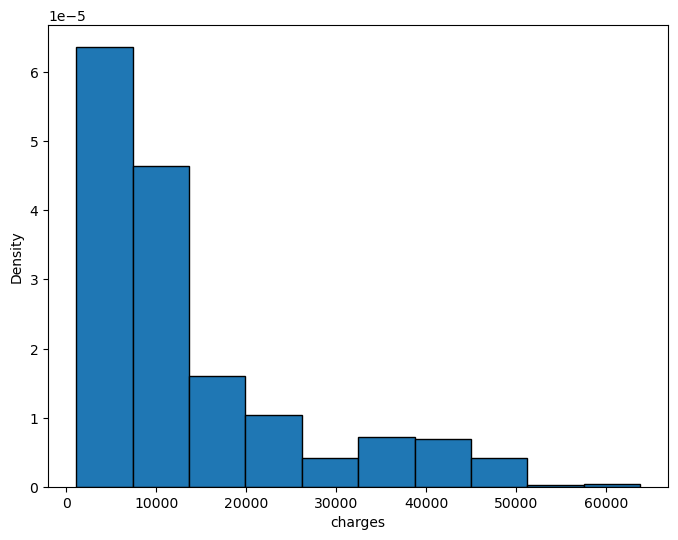

Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0    charges           9.439252
1        bmi           0.841121


Analysis complete. No action taken.                                                     


All categorical columns seem to be significant.                                         


Dataset does not contain any feature related to dates.                                  


Proceeding with default option for missing value imputation.                             
Proceeding with default option for handling remaining missing values.                    


No Missing Values Detected.                                                              


No imputation is Required.                                                               


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__171285723531015"'/23


smoker,children,sex,charges,region,id,bmi,age
yes,3,female,40941.2854,southeast,224,32.56,age_2
yes,2,female,21880.82,northwest,272,24.7,age_2
yes,0,female,45863.205,southeast,280,46.2,age_2
yes,2,female,19798.05455,northeast,288,20.045,age_2
yes,0,female,14711.7438,northwest,376,22.42,age_1
yes,1,female,17085.2676,southeast,392,26.84,age_1
no,0,male,1632.03625,northwest,51,25.175,age_1
no,0,female,1731.677,southwest,83,20.6,age_1
no,1,female,2719.27975,northwest,91,31.825,age_1
no,0,male,1632.56445,northwest,99,25.555,age_1


No information provided for Variable-Width Transformation.                               
Skipping customized string manipulation.⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾⫾｜ 21% - 5/23


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__171293842050838"'/23


region,smoker,children,sex,charges,age,id,bmi
12774.780611628787,no,3,female,18838.70366,age_1,155,27.93
12774.780611628787,no,0,male,1628.4709,age_1,235,22.61
12774.780611628787,no,0,male,1646.4297,age_1,251,35.53
12774.780611628787,no,0,female,2117.33885,age_1,275,22.515
12774.780611628787,no,0,male,1621.3402,age_1,291,17.48
12774.780611628787,no,1,female,2709.24395,age_1,307,24.605
12777.709305691702,no,1,male,1837.237,age_1,139,24.6
12777.709305691702,no,0,male,1256.299,age_1,179,30.4
12777.709305691702,no,0,female,1759.338,age_1,187,40.5
12777.709305691702,no,0,female,1748.774,age_1,195,32.9


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__171293835304755"'/23


['smoker', 'sex', 'age']


Skipping customized mathematical transformation.                                         


Skipping customized non-linear transformation.                                           


Skipping customized anti-select columns.                                                 


Training size : 0.9                                                                       
Testing size  : 0.1                                                                       


region,smoker_0,smoker_1,children,sex_0,sex_1,charges,age_0,age_1,age_2,id,bmi
13534.89941829259,1,0,2,1,0,7133.9025,0,1,0,28,19.95
13534.89941829259,1,0,3,1,0,6753.038,0,1,0,33,19.0
13534.89941829259,1,0,0,1,0,13616.3586,0,0,1,38,22.04
13534.89941829259,1,0,4,1,0,24671.66334,1,0,0,40,29.64
13534.89941829259,0,1,1,1,0,48517.56315,0,0,1,46,36.385
13534.89941829259,1,0,2,1,0,7144.86265,0,1,0,52,27.835
12777.709305691702,1,0,2,0,1,3484.331,1,0,0,8,23.7
12777.709305691702,1,0,1,1,0,6496.886,0,1,0,10,27.4
12777.709305691702,0,1,0,0,1,35491.64,0,1,0,25,30.8
12777.709305691702,1,0,0,0,1,1263.249,1,0,0,27,35.4


region,smoker_0,smoker_1,children,sex_0,sex_1,charges,age_0,age_1,age_2,id,bmi
13534.89941829259,1,0,1,0,1,6600.20595,0,1,0,114,34.105
13534.89941829259,1,0,0,0,1,10796.35025,0,0,1,220,28.975
13534.89941829259,1,0,1,0,1,9964.06,0,0,1,263,32.3
13534.89941829259,1,0,1,1,0,23288.9284,1,0,0,318,24.32
13534.89941829259,1,0,1,1,0,13725.47184,0,1,0,325,21.755
13534.89941829259,1,0,0,1,0,2459.7201,1,0,0,432,30.59
12774.780611628787,1,0,0,1,0,3201.24515,1,0,0,16,40.185
12774.780611628787,1,0,0,0,1,1632.56445,1,0,0,99,25.555
12774.780611628787,1,0,0,1,0,2128.43105,1,0,0,107,30.495
12774.780611628787,1,0,0,1,0,8988.15875,0,0,1,117,29.925


No information provided for customized outlier processing. AutoML will proceed with default settings.


Columns with outlier percentage :-                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  
  ColumnName  OutlierPercentage
0        bmi           0.841121
1    charges           9.439252


['bmi']
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__171285337238905"'1/23


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__171285894787725"'2/23
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__171286071711654"'


['children', 'sex_0', 'smoker_1', 'age_0', 'smoker_0', 'age_2', 'sex_1', 'region', 'bmi']


['children', 'region', 'bmi']


charges,sex_0,age_0,age_2,smoker_0,smoker_1,id,sex_1,children,region,bmi
7682.67,1,0,0,1,0,58,0,0.2,0.9999999999999989,0.11481844946025509
9788.8659,0,0,0,1,0,1267,1,1.0,0.9999999999999989,-0.4537127903173047
24671.6633,1,1,0,1,0,40,0,0.6,-0.10786382566487175,-0.10500490677134448
42124.5153,0,0,0,0,1,184,1,0.2,0.9999999999999989,0.3091265947006868
6653.7886,0,1,0,1,0,441,1,1.0,0.9999999999999989,0.1436048413477263
14394.3982,1,0,1,1,0,290,0,0.6,-0.10786382566487175,-0.16094210009813548
2699.5684,0,1,0,1,0,72,1,-1.0,-1.000000000000001,-0.011776251226692817
1632.0363,0,1,0,1,0,51,1,-1.0,-1.000000000000001,-0.3971213608112529
4504.6624,0,1,0,1,0,1320,1,0.6,0.9999999999999989,0.15799803729146192
6799.458,0,1,0,1,0,998,1,1.0,-0.10786382566487175,-0.1795878312070658


charges,sex_0,age_0,age_2,smoker_0,smoker_1,id,sex_1,children,region,bmi
11411.685,1,0,1,1,0,1130,0,0.2,-0.9965626436107424,0.8802747791952896
6666.243,0,1,0,1,0,385,1,1.0,-0.9965626436107424,0.7298004579653253
11033.6617,1,0,0,1,0,741,0,0.6,-1.000000000000001,0.6532548249918217
6548.1951,0,0,0,1,0,198,1,0.2,-1.000000000000001,-0.17337258750408913
5615.369,0,1,0,1,0,414,1,1.0,-0.9965626436107424,-0.4543670264965653
17128.4261,0,1,0,1,0,503,1,0.6,-0.10786382566487175,0.15603532875368017
2459.7201,1,1,0,1,0,432,0,-1.0,-0.10786382566487175,-0.04285246974157678
10796.3502,0,0,1,1,0,220,1,-1.0,-0.10786382566487175,-0.14851161269218185
36580.2822,1,0,1,1,0,102,0,0.6,0.9999999999999989,0.1364082433758585
8582.3023,1,0,0,1,0,559,0,1.0,0.9999999999999989,-0.48249918220477594


['children', 'sex_0', 'smoker_1', 'age_0', 'smoker_0', 'age_2', 'age_1', 'region', 'bmi']


['r_children', 'r_region', 'r_bmi']


r_age_0,r_smoker_1,r_age_2,charges,r_smoker_0,r_age_1,id,r_sex_0,r_children,r_region,r_bmi
0,0,0,7682.67,1,1,58,1,0.2,0.9999999999999989,0.11481844946025509
0,0,0,9788.8659,1,1,1267,0,1.0,0.9999999999999989,-0.4537127903173047
1,0,0,24671.6633,1,0,40,1,0.6,-0.10786382566487175,-0.10500490677134448
0,1,0,42124.5153,0,1,184,0,0.2,0.9999999999999989,0.3091265947006868
1,0,0,6653.7886,1,0,441,0,1.0,0.9999999999999989,0.1436048413477263
0,0,1,14394.3982,1,0,290,1,0.6,-0.10786382566487175,-0.16094210009813548
1,0,0,2699.5684,1,0,72,0,-1.0,-1.000000000000001,-0.011776251226692817
1,0,0,1632.0363,1,0,51,0,-1.0,-1.000000000000001,-0.3971213608112529
1,0,0,4504.6624,1,0,1320,0,0.6,0.9999999999999989,0.15799803729146192
1,0,0,6799.458,1,0,998,0,1.0,-0.10786382566487175,-0.1795878312070658


r_age_0,r_smoker_1,r_age_2,charges,r_smoker_0,r_age_1,id,r_sex_0,r_children,r_region,r_bmi
0,0,1,11411.685,1,0,1130,1,0.2,-0.9965626436107424,0.8802747791952896
1,0,0,6666.243,1,0,385,0,1.0,-0.9965626436107424,0.7298004579653253
0,0,0,11033.6617,1,1,741,1,0.6,-1.000000000000001,0.6532548249918217
0,0,0,6548.1951,1,1,198,0,0.2,-1.000000000000001,-0.17337258750408913
1,0,0,5615.369,1,0,414,0,1.0,-0.9965626436107424,-0.4543670264965653
1,0,0,17128.4261,1,0,503,0,0.6,-0.10786382566487175,0.15603532875368017
1,0,0,2459.7201,1,0,432,1,-1.0,-0.10786382566487175,-0.04285246974157678
0,0,1,10796.3502,1,0,220,0,-1.0,-0.10786382566487175,-0.14851161269218185
0,0,1,36580.2822,1,0,102,1,0.6,0.9999999999999989,0.1364082433758585
0,0,0,8582.3023,1,1,559,1,1.0,0.9999999999999989,-0.48249918220477594


['region', 'children', 'bmi']


charges,smoker_1,sex_0,age_0,smoker_0,age_2,age_1,id,sex_1,region,children,bmi
13616.3586,0,1,0,1,1,0,38,0,-0.1078638201468002,-1.0,-0.6022244030094865
48517.56315,1,1,0,0,1,0,46,0,-0.1078638201468002,-0.6,0.33627739614000635
7144.86265,0,1,0,1,0,1,52,0,-0.1078638201468002,-0.2,-0.22309453712790317
9288.0267,0,0,0,1,1,0,53,1,-0.1078638201468002,-0.6,-0.09257441936539108
4661.28635,0,0,1,1,0,0,80,1,-0.1078638201468002,0.2,-0.26038599934576384
27375.90478,0,0,0,1,0,1,81,1,-0.1078638201468002,-0.2,-0.5773634281975792
35491.64,1,0,0,0,0,1,25,1,-0.9965626505878525,-1.0,-0.029113509977101753
23306.547,1,0,0,0,1,0,29,1,-0.9965626505878525,-0.2,-0.36931632319267255
7196.867,0,0,0,1,0,1,34,1,-0.9965626505878525,0.2,0.2652927706902189
34779.615,1,0,1,0,0,0,35,1,-0.9965626505878525,-1.0,0.23258096172718326


charges,smoker_1,sex_0,age_0,smoker_0,age_2,age_1,id,sex_1,region,children,bmi
6600.20595,0,0,0,1,0,1,114,1,-0.1078638201468002,-0.6,0.1871115472685637
10796.35025,0,0,0,1,1,0,220,1,-0.1078638201468002,-1.0,-0.14851161269218185
9964.06,0,0,0,1,1,0,263,1,-0.1078638201468002,-0.6,0.06902191691200499
23288.9284,0,1,1,1,0,0,318,0,-0.1078638201468002,-0.6,-0.45305855413804386
13725.47184,0,1,0,1,0,1,325,0,-0.1078638201468002,-0.6,-0.6208701341184168
2459.7201,0,1,1,1,0,0,432,0,-0.1078638201468002,-1.0,-0.04285246974157678
13844.506,1,1,1,0,0,0,11,0,-0.9965626505878525,-1.0,-0.6244684331043507
1731.677,0,1,1,1,0,0,83,0,-0.9965626505878525,-1.0,-0.6964344128230291
6600.361,0,0,0,1,0,1,90,1,-0.9965626505878525,-0.2,-0.08799476611056607
4076.497,0,0,1,1,0,0,119,1,-0.9965626505878525,-0.6,0.01668302257114812


['col_0', 'col_1', 'col_2', 'col_3', 'col_4', 'col_5', 'col_6']


                                                                                          
Skipping customized hyperparameter tuning


response_column : charges                                                                                                                             
name : decision_forest
tree_type : Regression
min_impurity : (0.0, 0.1, 0.2)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
num_trees : (-1, 20, 30)
Total number of models for decision_forest : 108
--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

response_column : charges
name : xgboost
model_type : Regression
column_sampling : (1, 0.6)
min_impurity : (0.0, 0.1, 0.2)
lambda1 : (0.01, 0.1, 1, 10)
shrinkage_factor : (0.5, 0.1, 0.3)
max_depth : (5, 6, 8, 10)
min_node_size : (1, 2, 3)
iter_num : (10, 20, 30)
Total number of models for xgboost : 2592
-------------------------------------------------------------------------------------------------------------------------------------------

DECISIONFOREST_0                                                                                                                                                                                        
DECISIONFOREST_4                                                                          
DECISIONFOREST_5                                                                          


XGBOOST_0                                                                                                                                                                                               
XGBOOST_1                                                                                 
XGBOOST_2                                                                                 


KNN_9                                                                                                                                                                                                   
KNN_4                                                                                     
KNN_8                                                                                     


SVM_3                                                                                                                                                                                                   
SVM_1                                                                                     
SVM_2                                                                                     


GLM_3                                                                                                                                                                                                   
GLM_1                                                                                     
GLM_2                                                                                     


,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,decision_forest,lasso,3043.335467,2.704768e+07,0.227603,5200.738616,0.477078,0.823580,0.807211
1,2,decision_forest,rfe,4200.135217,3.343545e+07,0.491493,5782.339348,0.701066,0.781916,0.761681
2,3,knn,lasso,3834.866532,3.632309e+07,0.275992,6026.864077,0.525350,0.763081,0.741099
3,4,knn,pca,3708.025781,3.874729e+07,0.263428,6224.732015,0.513252,0.747269,0.729399
4,5,knn,rfe,3820.792418,3.922171e+07,0.261206,6262.723879,0.511084,0.744175,0.720438
5,6,decision_forest,pca,4147.400873,3.958853e+07,0.308471,6291.941488,0.555402,0.741782,0.723524
6,7,glm,lasso,4833.516532,4.030297e+07,0.359495,6348.462299,0.599579,0.737122,0.712731
7,8,glm,pca,5616.536292,5.197557e+07,0.451758,7209.408306,0.672130,0.660987,0.637016
8,9,glm,rfe,7275.914147,7.932505e+07,0.607235,8906.460909,0.779253,0.482599,0.434592
9,10,xgboost,rfe,7800.571845,1.019105e+08,2.238702,10095.071089,1.496229,0.335284,0.273609


In [17]:
# Fitting train data
aml.fit(insurance_df_train, insurance_df_train.charges)

## <b><span style='color:#F1A424'>| 3.</span> Leaderboard : </b>

In [18]:
# Fetching Leaderboard
aml.leaderboard()

,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,decision_forest,lasso,3043.335467,2.704768e+07,0.227603,5200.738616,0.477078,0.823580,0.807211
1,2,decision_forest,rfe,4200.135217,3.343545e+07,0.491493,5782.339348,0.701066,0.781916,0.761681
2,3,knn,lasso,3834.866532,3.632309e+07,0.275992,6026.864077,0.525350,0.763081,0.741099
3,4,knn,pca,3708.025781,3.874729e+07,0.263428,6224.732015,0.513252,0.747269,0.729399
4,5,knn,rfe,3820.792418,3.922171e+07,0.261206,6262.723879,0.511084,0.744175,0.720438
5,6,decision_forest,pca,4147.400873,3.958853e+07,0.308471,6291.941488,0.555402,0.741782,0.723524
6,7,glm,lasso,4833.516532,4.030297e+07,0.359495,6348.462299,0.599579,0.737122,0.712731
7,8,glm,pca,5616.536292,5.197557e+07,0.451758,7209.408306,0.672130,0.660987,0.637016
8,9,glm,rfe,7275.914147,7.932505e+07,0.607235,8906.460909,0.779253,0.482599,0.434592
9,10,xgboost,rfe,7800.571845,1.019105e+08,2.238702,10095.071089,1.496229,0.335284,0.273609


## <b><span style='color:#F1A424'>| 4.</span> Best Performing Model : </b>

In [19]:
# Fetching best performing model for dataset
aml.leader()

,Rank,Name,Feature selection,MAE,MSE,MSLE,RMSE,RMSLE,R2-score,Adjusted R2-score
0,1,decision_forest,lasso,3043.335467,2.704768e+07,0.227603,5200.738616,0.477078,0.82358,0.807211


## <b><span style='color:#F1A424'>| 5.</span> Generating Prediction : </b>

### <b><span style='color:#F1A424'>| 5.1.</span> Generating prediction on default validation test data </b>

In [20]:
# Generating prediction and metrics on default test data
prediction = aml.predict(rank=2)

decision_forest rfe

 Prediction : 
      charges    id    prediction  confidence_lower  confidence_upper
0  11411.6850  1130   9394.224064       7327.929888      11460.518241
1   6666.2430   385   8050.921001       6397.692735       9704.149268
2  11033.6617   741   9290.141873       6975.640296      11604.643451
3   6548.1951   198  10558.899417       8411.335647      12706.463187
4   5615.3690   414  11193.321225       8138.093811      14248.548639
5  17128.4261   503   8039.474264       6289.850267       9789.098261
6   2459.7201   432   6755.366985       5233.724518       8277.009453
7  10796.3502   220   7294.366296       5171.795589       9416.937002
8  36580.2822   102  10033.349636       8041.387032      12025.312241
9   8582.3023   559   8344.863833       7428.906880       9260.820785

 Performance Metrics : 
           MAE           MSE      MSLE       MAPE        MPE         RMSE     RMSLE            ME        R2        EV          MPD       MGD
0  4200.135217  3.343545e+07

In [21]:
# Printing prediction
prediction.head()

charges,id,prediction,confidence_lower,confidence_upper
1252.407,219,6048.838871184683,4286.524429811982,7811.153312557383
1534.3045,1435,6089.145276028177,4015.6913450933403,8162.599206963014
1632.5645,99,6458.689039164301,4503.896238577454,8413.481839751148
1633.9618,872,6672.579272391447,4835.520857058482,8509.637687724413
1877.9294,472,6906.8296804103065,5167.011111895937,8646.648248924677
1909.5275,1427,6382.100484954478,4617.601694425307,8146.599275483649
1731.677,83,6683.862810929995,4986.082004316255,8381.643617543736
1526.312,1475,6328.527943076874,4673.24904657526,7983.8068395784885
1137.4697,752,5772.963794934506,3643.544790434683,7902.382799434329
1121.8739,984,7670.342083769855,5223.266876161064,10117.417291378646


### <b><span style='color:#F1A424'>| 5.2. </span> Generating prediction on external test data </b>

In [22]:
# Generating prediction and metrics on test data
prediction = aml.predict(insurance_df_test)

Data Transformation started ...
Performing transformation carried out in feature engineering phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__171286845572144"'

Updated dataset after performing customized equal width bin-code transformation :


smoker,children,sex,charges,region,id,bmi,age
yes,2,male,39241.442,southwest,235,37.8,age_1
yes,0,female,23065.4207,southeast,275,27.83,age_2
yes,1,female,42969.8527,southeast,291,36.63,age_2
yes,0,male,41676.0811,southeast,307,36.19,age_2
yes,1,male,28868.6639,northwest,30,28.31,age_3
yes,3,female,30942.1918,southeast,62,29.92,age_3
no,1,female,2331.519,southwest,51,28.4,age_1
no,0,male,1639.5631,northwest,67,30.59,age_1
no,0,female,1737.376,southwest,75,24.7,age_1
no,0,male,1253.936,southwest,83,28.7,age_1


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__171286625576438"'

Updated dataset after performing customized categorical encoding :


region,smoker,children,sex,charges,age,id,bmi
12774.780611628787,no,0,male,9869.8102,age_3,179,28.88
12774.780611628787,no,2,female,3579.8287,age_1,379,33.63
12774.780611628787,no,2,male,14119.62,age_3,22,32.3
12774.780611628787,no,0,female,13429.0354,age_3,46,31.16
12774.780611628787,no,0,male,10231.4999,age_3,174,30.21
12774.780611628787,no,3,female,12475.3513,age_3,182,21.47
12774.780611628787,no,0,female,5267.81815,age_2,70,26.885
12774.780611628787,no,1,male,4032.2407,age_1,251,24.13
12774.780611628787,no,0,male,12124.9924,age_3,147,25.46
12774.780611628787,no,1,female,2730.10785,age_1,107,39.615


result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__171291453201674"'

Updated dataset after performing categorical encoding :


region,smoker_0,smoker_1,children,sex_0,sex_1,charges,age_0,age_1,age_2,id,bmi
12774.780611628787,1,0,2,0,1,14119.62,0,0,1,22,32.3
12774.780611628787,1,0,0,0,1,10231.4999,0,0,1,174,30.21
12774.780611628787,1,0,3,1,0,12475.3513,0,0,1,182,21.47
12774.780611628787,1,0,0,0,1,24476.47851,0,0,1,206,30.02
12774.780611628787,1,0,0,1,0,7421.19455,0,1,0,302,27.645
12774.780611628787,1,0,2,1,0,8017.06115,0,1,0,350,24.985
14478.822716027873,1,0,0,1,0,17929.30337,0,1,0,339,31.79
14478.822716027873,1,0,2,1,0,4340.4409,1,0,0,118,26.51
14478.822716027873,1,0,0,1,0,3171.6149,1,0,0,134,33.11
14478.822716027873,1,0,0,1,0,24227.33724,0,0,1,150,41.91


Performing transformation carried out in data preparation phase ...
result data stored in table '"AUTOML_USR"."ml__td_sqlmr_persist_out__171287452344413"'

Updated dataset after performing Lasso feature selection:


id,children,sex_0,smoker_1,age_0,smoker_0,age_2,sex_1,region,bmi,charges
159,5,1,0,0,1,0,0,14478.8227,34.32,8596.8278
262,1,0,0,0,1,0,1,12774.7806,25.365,7518.0253
114,1,0,0,0,1,1,1,12777.7093,43.7,11576.13
141,1,0,0,0,1,0,1,12774.7806,36.67,28468.919
146,1,0,0,1,1,0,1,12774.7806,28.31,2639.0429
63,1,0,0,0,1,1,1,14478.8227,35.97,9386.1613
336,4,0,0,1,1,0,1,12774.7806,26.695,4877.9811
174,0,0,0,0,1,1,1,12774.7806,30.21,10231.4999
302,0,1,0,0,1,0,0,12774.7806,27.645,7421.1946
9,0,0,0,0,1,0,1,12774.7806,35.815,4320.4109



Updated dataset after performing scaling on Lasso selected features :


charges,sex_0,age_0,age_2,smoker_0,smoker_1,id,sex_1,children,region,bmi
4618.0799,1,1,0,1,0,103,0,0.2,-1.000000000000001,-0.06771344455348381
27941.2876,0,0,1,1,0,38,1,0.2,-0.9965626436107424,0.31763166503107626
12105.32,1,0,1,1,0,214,0,0.2,-0.9965626436107424,-0.029113509977101753
6196.448,1,0,0,1,0,17,0,0.2,-0.9965626436107424,0.44193653909061165
4234.927,1,1,0,1,0,127,0,0.2,-0.9965626436107424,-0.07491004252535162
8522.003,1,0,0,1,0,96,0,0.2,-0.9965626436107424,0.20641151455675483
3906.127,0,1,0,1,0,360,1,0.2,-0.9965626436107424,-0.290807981681387
4915.0598,0,1,0,1,0,120,1,1.0,-0.10786382566487175,-0.07392868825646075
4687.797,1,1,0,1,0,91,0,1.0,-0.9965626436107424,-0.17304546941445859
8596.8278,1,0,0,1,0,159,0,1.0,0.9999999999999989,0.20117762512266923



Updated dataset after performing RFE feature selection:


id,children,sex_0,smoker_1,age_0,smoker_0,age_2,age_1,region,bmi,charges
91,5,1,0,1,1,0,0,12777.7093,28.6,4687.797
13,5,1,0,0,1,1,0,12777.7093,31.9,11552.904
262,1,0,0,0,1,0,1,12774.7806,25.365,7518.0253
114,1,0,0,0,1,1,0,12777.7093,43.7,11576.13
32,1,0,0,1,1,0,0,14478.8227,46.53,2927.0647
146,1,0,0,1,1,0,0,12774.7806,28.31,2639.0429
63,1,0,0,0,1,1,0,14478.8227,35.97,9386.1613
174,0,0,0,0,1,1,0,12774.7806,30.21,10231.4999
302,0,1,0,0,1,0,1,12774.7806,27.645,7421.1946
9,0,0,0,0,1,0,1,12774.7806,35.815,4320.4109



Updated dataset after performing scaling on RFE selected features :


r_age_0,r_smoker_1,r_age_2,charges,r_smoker_0,r_age_1,id,r_sex_0,r_children,r_region,r_bmi
0,0,0,7421.1946,1,1,302,1,-1.0,-1.000000000000001,-0.23552502453385682
0,0,1,14210.5359,1,0,57,0,-1.0,-1.000000000000001,0.43572129538763493
1,0,0,3866.8552,1,0,15,0,-1.0,-1.000000000000001,-0.1547268563951588
0,0,1,9644.2525,1,0,39,1,-1.0,-1.000000000000001,-0.863264638534511
0,0,1,8827.2099,1,0,133,0,-1.0,-1.000000000000001,-0.3163231926725548
0,0,1,14254.6082,1,0,205,1,-1.0,-1.000000000000001,-0.4033366045142298
1,0,0,3176.2877,1,0,24,1,-1.0,-1.000000000000001,-0.5897939156035329
1,0,0,4915.0598,1,0,120,0,1.0,-0.10786382566487175,-0.07392868825646075
1,0,0,4687.797,1,0,91,1,1.0,-0.9965626436107424,-0.17304546941445859
0,0,0,8596.8278,1,1,159,1,1.0,0.9999999999999989,0.20117762512266923



Updated dataset after performing scaling for PCA feature selection :


charges,smoker_1,sex_0,age_0,smoker_0,age_2,age_1,id,sex_1,region,children,bmi
4687.797,0,1,1,1,0,0,91,0,-0.9965626572680882,1.0,-0.17304546941445859
11552.904,0,1,0,1,1,0,13,0,-0.9965626572680882,1.0,0.04285246974157655
7518.0253,0,0,0,1,0,1,262,1,-1.0000000136484732,-0.6,-0.38469087340529945
11576.13,0,0,0,1,1,0,114,1,-0.9965626572680882,-0.6,0.8148511612692183
2927.0647,0,0,1,1,0,0,32,1,0.999999981188408,-0.6,1.0
2639.0429,0,0,1,1,0,0,146,1,-1.0000000136484732,-0.6,-0.19201831861301943
9386.1613,0,0,0,1,1,0,63,1,0.999999981188408,-0.6,0.3091265947006868
10269.46,0,0,0,1,1,0,61,1,-1.0000000136484732,0.2,0.06902191691200499
4618.0799,0,1,1,1,0,0,103,0,-1.0000000136484732,0.2,-0.06771344455348381
9620.3307,0,0,0,1,0,1,315,1,-1.0000000136484732,0.2,-0.09257441936539108



Updated dataset after performing PCA feature selection :


,id,col_0,col_1,col_2,col_3,col_4,col_5,col_6,charges
0,120,0.141522,0.788872,-0.190910,0.289694,-0.838601,1.456858,0.028977,4915.0598
1,336,-0.757173,0.813099,-0.361259,0.211241,-0.707794,1.091215,-0.079436,4877.9811
2,61,-0.751350,0.719612,0.583819,-0.608888,0.074272,0.818409,0.104571,10269.4600
3,174,-0.739838,0.632575,0.233819,-0.961528,0.331817,-0.238487,-0.039572,10231.4999
4,91,-0.815895,-0.541591,-0.291561,0.530225,-0.656344,1.529833,0.108363,4687.7970
...,...,...,...,...,...,...,...,...,...
263,44,-0.786906,-0.651114,0.669300,0.480908,-0.425164,-0.057688,0.412247,6571.5440
264,37,-0.885888,-0.710749,0.360736,-0.479334,0.265915,0.552648,-0.422750,10156.7832
265,350,-0.871921,-0.669101,0.608724,0.527439,-0.457271,-0.057465,-0.218569,8017.0612
266,22,-0.741719,0.691892,0.471442,-0.729731,0.162414,0.466091,0.101330,14119.6200


Data Transformation completed.
decision_forest lasso

 Prediction : 
      charges   id    prediction  confidence_lower  confidence_upper
0   9620.3307  315   7933.637210       7320.188428       8547.085991
1  12105.3200  214  13026.660612       8967.771404      17085.549820
2   6196.4480   17   8140.268406       7668.140356       8612.396456
3   5972.3780   89   5802.050907       4033.270156       7570.831659
4   8522.0030   96   8153.807272       7700.042949       8607.571595
5   3906.1270  360   9758.780261       5364.010148      14153.550373
6  10231.4999  174  11292.014852      10828.832395      11755.197309
7   7421.1946  302   9045.088294       3848.529834      14241.646754
8   4320.4109    9   6756.402479       5988.807046       7523.997913
9  14210.5359   57  12537.172690      10173.159273      14901.186106

 Performance Metrics : 
           MAE           MSE      MSLE       MAPE        MPE         RMSE     RMSLE            ME        R2        EV          MPD       MGD
0  263

In [23]:
# Printing prediction
prediction.head()

charges,id,prediction,confidence_lower,confidence_upper
1253.936,83,2659.936750454854,1679.6927489882328,3640.1807519214753
1621.8827,216,3257.4544591621193,2070.901208568264,4444.007709755975
1625.4337,123,2106.718929866619,1756.9055030319528,2456.532356701285
1635.7336,99,2659.936750454854,1679.6927489882328,3640.1807519214753
1674.6323,122,3460.7555264713383,2093.579146088491,4827.931906854185
1682.597,154,4049.3998048494486,1093.377448427409,7005.422161271488
1639.5631,67,2659.936750454854,1679.6927489882328,3640.1807519214753
1261.859,19,3098.688392625184,1932.5078781067339,4264.868907143634
1242.816,131,2106.718929866619,1756.9055030319528,2456.532356701285
1141.4451,208,4411.466938695602,1433.305580776405,7389.628296614799


In [24]:
remove_context()

True